In [ ]:
### Code contains analysis for pathway enrichment analysis with sets of genes in clusters of downregulated DGEs in old vs young mice at day 37 shown in Extended Data Figure 7

In [1]:
import pandas as pd
import gseapy 
import diffxpy.api as de
import warnings
import os
warnings.filterwarnings("ignore")

In [2]:
import rpy2
%load_ext rpy2.ipython

In [3]:
%%R
library(ggplot2)
library(gdata)
library(tidyr)
library(pheatmap)
library(tibble)
library(openxlsx)
library(clusterSim)
library(viridis)
library(dichromat)


Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

The following object is masked from ‘package:base’:

    startsWith


Attaching package: ‘tidyr’

The following object is masked from ‘package:gdata’:

    starts_with

Loading required package: cluster
Loading required package: MASS
Loading required package: viridisLite
In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


### Heatmap for Pathway Enrichment

In [4]:
logfc = "025"
age = "old"

ncluster = "11"
cluster = 11

In [ ]:
c1_genes = pd.read_csv(f"/home/michaelammeter/projects/aging/dge_splines/output/cluster_1_qval_logfc{logfc}_ncluster{ncluster}_{age}_mice_d37_dge_set_zscore_pseudobulk.txt", header = None)
c2_genes = pd.read_csv(f"/home/michaelammeter/projects/aging/dge_splines/output/cluster_2_qval_logfc{logfc}_ncluster{ncluster}_{age}_mice_d37_dge_set_zscore_pseudobulk.txt", header = None)
c3_genes = pd.read_csv(f"/home/michaelammeter/projects/aging/dge_splines/output/cluster_3_qval_logfc{logfc}_ncluster{ncluster}_{age}_mice_d37_dge_set_zscore_pseudobulk.txt", header = None)
c4_genes = pd.read_csv(f"/home/michaelammeter/projects/aging/dge_splines/output/cluster_4_qval_logfc{logfc}_ncluster{ncluster}_{age}_mice_d37_dge_set_zscore_pseudobulk.txt", header = None)
c5_genes = pd.read_csv(f"/home/michaelammeter/projects/aging/dge_splines/output/cluster_5_qval_logfc{logfc}_ncluster{ncluster}_{age}_mice_d37_dge_set_zscore_pseudobulk.txt", header = None)
c6_genes = pd.read_csv(f"/home/michaelammeter/projects/aging/dge_splines/output/cluster_6_qval_logfc{logfc}_ncluster{ncluster}_{age}_mice_d37_dge_set_zscore_pseudobulk.txt", header = None)
c7_genes = pd.read_csv(f"/home/michaelammeter/projects/aging/dge_splines/output/cluster_7_qval_logfc{logfc}_ncluster{ncluster}_{age}_mice_d37_dge_set_zscore_pseudobulk.txt", header = None)
c8_genes = pd.read_csv(f"/home/michaelammeter/projects/aging/dge_splines/output/cluster_8_qval_logfc{logfc}_ncluster{ncluster}_{age}_mice_d37_dge_set_zscore_pseudobulk.txt", header = None)
c9_genes = pd.read_csv(f"/home/michaelammeter/projects/aging/dge_splines/output/cluster_9_qval_logfc{logfc}_ncluster{ncluster}_{age}_mice_d37_dge_set_zscore_pseudobulk.txt", header = None)
c10_genes = pd.read_csv(f"/home/michaelammeter/projects/aging/dge_splines/output/cluster_10_qval_logfc{logfc}_ncluster{ncluster}_{age}_mice_d37_dge_set_zscore_pseudobulk.txt", header = None)
c11_genes = pd.read_csv(f"/home/michaelammeter/projects/aging/dge_splines/output/cluster_11_qval_logfc{logfc}_ncluster{ncluster}_{age}_mice_d37_dge_set_zscore_pseudobulk.txt", header = None)

c1_genes = c1_genes[0].values.tolist()
c2_genes = c2_genes[0].values.tolist() 
c3_genes = c3_genes[0].values.tolist() 
c4_genes = c4_genes[0].values.tolist() 
c5_genes = c5_genes[0].values.tolist() 
c6_genes = c6_genes[0].values.tolist() 
c7_genes = c7_genes[0].values.tolist() 
c8_genes = c8_genes[0].values.tolist() 
c9_genes = c9_genes[0].values.tolist()
c10_genes = c10_genes[0].values.tolist()
c11_genes = c11_genes[0].values.tolist()

In [ ]:
import os
output_dir = "/home/michaelammeter/projects/aging/dge_splines/output/gsea_results_d37/"
cluster = 11

for item in [c1_genes, c2_genes, c3_genes, c4_genes, c5_genes, c6_genes, c7_genes, c8_genes, c9_genes, c10_genes, c11_genes]:    
    enr_res = gseapy.enrichr(gene_list = item,
                     organism = 'Mouse',
                     gene_sets = ['GO_Biological_Process_2023', 'Reactome_2022', 'MSigDB_Hallmark_2020', 'KEGG_2019_Mouse'],
                     cutoff = 1, no_plot = True,
                     outdir = output_dir)
    
    tab_reactome = pd.read_csv(output_dir + "Reactome_2022.Mouse.enrichr.reports.txt", sep = "\t")
    tab_reactome = tab_reactome.sort_values(by = ["P-value"], ascending = True)
    #tab_reactome = tab_reactome.loc[1:3]
    
    tab_gobp = pd.read_csv(output_dir + "GO_Biological_Process_2023.Mouse.enrichr.reports.txt", sep = "\t")
    tab_gobp = tab_gobp.sort_values(by = ["P-value"], ascending = True)
    #tab_gobp = tab_gobp.loc[1:3]
    
    tab_kegg = pd.read_csv(output_dir + "KEGG_2019_Mouse.Mouse.enrichr.reports.txt", sep = "\t")
    tab_kegg = tab_kegg.sort_values(by = ["P-value"], ascending = True)
    #tab_kegg = tab_kegg.loc[1:3]

    tab_msigdb = pd.read_csv(output_dir + "MSigDB_Hallmark_2020.Mouse.enrichr.reports.txt", sep = "\t")
    tab_msigdb = tab_msigdb.sort_values(by = ["P-value"], ascending = True)
    #tab_msigdb = tab_msigdb.loc[1:3]

    tab_all = pd.concat([tab_reactome, tab_gobp, tab_msigdb, tab_kegg])
    tab_all = tab_all.loc[tab_all["Adjusted P-value"] <= 0.05]
    tab_all = tab_all.sort_values("Adjusted P-value")
    
    cluster = cluster + 1
    filename = f'/home/michaelammeter/projects/aging/dge_splines/output/gsea_results_d37/gsea_tables/cluster_{cluster}_gsea_results_qval_logfc{logfc}_ncluster{ncluster}_{age}_mice_d37_dge_set_zscore_pseudobulk.csv'
    tab_all.to_csv(filename, header = True, index = False, encoding = "utf-8")
    try:
        os.remove(output_dir + "Reactome_2022.Mouse.enrichr.reports.txt")
    except Exception:
        pass
    try:
        os.remove(output_dir + "GO_Biological_Process_2023.Mouse.enrichr.reports.txt")
    except Exception:
        pass
    try:
        os.remove(output_dir + "KEGG_2019_Mouse.Mouse.enrichr.reports.txt")
    except Exception:
        pass
    try:
        os.remove(output_dir + "MSigDB_Hallmark_2020.Mouse.enrichr.reports.txt")
    except Exception:
        pass
    

In [5]:
clusters = [f"cluster_{i}" for i in range(1, 12)]  # Generates cluster_1 to cluster_11

# Initialize an empty list to store DataFrames
dataframes = []

for cluster in clusters:
    file_path = f'/home/michaelammeter/projects/aging/dge_splines/output/gsea_results_d37/gsea_tables/{cluster}_gsea_results_qval_logfc{logfc}_ncluster{ncluster}_{age}_mice_d37_dge_set_zscore_pseudobulk.csv'
    
    try:
        # Load the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Add a new column with the cluster name
        df['cluster'] = cluster
        
        # Append the DataFrame to the list
        dataframes.append(df)
    except FileNotFoundError:
        print(f"File not found: {file_path}")

# Concatenate all DataFrames into a single DataFrame
final_df = pd.concat(dataframes, ignore_index=True)

# Display the final DataFrame
final_df

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,cluster
0,KEGG_2019_Mouse,Thermogenesis,7/231,0.000003,0.000226,0,0,13.113030,167.68740,SMARCD2;NDUFB5;ATP5K;NDUFB2;UQCR11;UQCR10;PNPLA2,cluster_1
1,KEGG_2019_Mouse,Oxidative phosphorylation,5/134,0.000030,0.001233,0,0,15.675530,163.02260,NDUFB5;ATP5K;NDUFB2;UQCR11;UQCR10,cluster_1
2,Reactome_2022,Citric Acid (TCA) Cycle And Respiratory Electr...,5/163,0.000077,0.009201,0,0,12.779640,120.96990,NDUFB5;BSG;NDUFB2;UQCR11;UQCR10,cluster_1
3,Reactome_2022,Respiratory Electron Transport R-HSA-611105,4/90,0.000102,0.009201,0,0,18.474420,169.77250,NDUFB5;NDUFB2;UQCR11;UQCR10,cluster_1
4,Reactome_2022,mRNA Splicing - Major Pathway R-HSA-72163,5/181,0.000127,0.009201,0,0,11.462200,102.84530,HNRNPL;PUF60;U2AF2;U2AF1;SNRPF,cluster_1
...,...,...,...,...,...,...,...,...,...,...,...
534,GO_Biological_Process_2023,Negative Regulation Of Angiogenesis (GO:0016525),3/86,0.000956,0.038241,0,0,17.101550,118.90230,CLDN5;NAXE;GTF2I,cluster_11
535,Reactome_2022,Metabolism Of Lipids R-HSA-556833,7/732,0.001154,0.040850,0,0,4.886025,33.05181,ELOVL1;ACLY;MID1IP1;FASN;CLSTN1;PMVK;DHCR24,cluster_11
536,GO_Biological_Process_2023,Regulation Of Angiogenesis (GO:0045765),4/205,0.001150,0.042696,0,0,9.588157,64.89663,CLDN5;NAXE;EMP2;GTF2I,cluster_11
537,Reactome_2022,Cholesterol Biosynthesis R-HSA-191273,2/26,0.001554,0.045856,0,0,38.625970,249.78020,PMVK;DHCR24,cluster_11


In [14]:
final_df['cluster'] = final_df['cluster'].str.replace('cluster_', 'C')
final_df

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,cluster
0,KEGG_2019_Mouse,Thermogenesis,7/231,0.000003,0.000226,0,0,13.113030,167.68740,SMARCD2;NDUFB5;ATP5K;NDUFB2;UQCR11;UQCR10;PNPLA2,C1
1,KEGG_2019_Mouse,Oxidative phosphorylation,5/134,0.000030,0.001233,0,0,15.675530,163.02260,NDUFB5;ATP5K;NDUFB2;UQCR11;UQCR10,C1
2,Reactome_2022,Citric Acid (TCA) Cycle And Respiratory Electr...,5/163,0.000077,0.009201,0,0,12.779640,120.96990,NDUFB5;BSG;NDUFB2;UQCR11;UQCR10,C1
3,Reactome_2022,Respiratory Electron Transport R-HSA-611105,4/90,0.000102,0.009201,0,0,18.474420,169.77250,NDUFB5;NDUFB2;UQCR11;UQCR10,C1
4,Reactome_2022,mRNA Splicing - Major Pathway R-HSA-72163,5/181,0.000127,0.009201,0,0,11.462200,102.84530,HNRNPL;PUF60;U2AF2;U2AF1;SNRPF,C1
...,...,...,...,...,...,...,...,...,...,...,...
534,GO_Biological_Process_2023,Negative Regulation Of Angiogenesis (GO:0016525),3/86,0.000956,0.038241,0,0,17.101550,118.90230,CLDN5;NAXE;GTF2I,C11
535,Reactome_2022,Metabolism Of Lipids R-HSA-556833,7/732,0.001154,0.040850,0,0,4.886025,33.05181,ELOVL1;ACLY;MID1IP1;FASN;CLSTN1;PMVK;DHCR24,C11
536,GO_Biological_Process_2023,Regulation Of Angiogenesis (GO:0045765),4/205,0.001150,0.042696,0,0,9.588157,64.89663,CLDN5;NAXE;EMP2;GTF2I,C11
537,Reactome_2022,Cholesterol Biosynthesis R-HSA-191273,2/26,0.001554,0.045856,0,0,38.625970,249.78020,PMVK;DHCR24,C11


In [15]:
# List of terms to filter from manually selected pathways
terms_to_filter = [
    "Oxidative Phosphorylation", "Adipogenesis", "p53 Pathway", "Glycolysis", 
    "Epithelial Mesenchymal Transition", "Allograft Rejection", "Complement",
    "TNF-alpha Signaling via NF-kB", "Reactive Oxygen Species Pathway", "Apical Junction",
    "Apoptosis", "Xenobiotic Metabolism", "Androgen Response", "Hypoxia",
    "Coagulation", "IL-2/STAT5 Signaling", "heme Metabolism", "Fatty Acid Metabolism",
    "0045333", "0008380", "0090169", "0032386", "0090158", "0085029",
    "0019722", "0022408", "0019511", "0002283", "0002431", "0019221",
    "0097084", "0048514", "0001570", "0043116", "0070486", "0006986",
    "0070585", "0090162", "0006898", "0071635", "0050679", "0006084",
    "0016126", "0031579"
]

df_filtered = final_df[final_df['Term'].apply(lambda x: any(term in x for term in terms_to_filter))]
df_filtered

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,cluster
13,GO_Biological_Process_2023,Cellular Respiration (GO:0045333),4/85,8.171369e-05,1.272217e-02,0,0,19.619750,184.66680,NDUFB5;NDUFB2;UQCR11;UQCR10,C1
19,MSigDB_Hallmark_2020,Oxidative Phosphorylation,4/200,2.076593e-03,2.180423e-02,0,0,8.061224,49.79440,NDUFB5;NDUFB2;UQCR11;UQCR10,C1
20,MSigDB_Hallmark_2020,Adipogenesis,4/200,2.076593e-03,2.180423e-02,0,0,8.061224,49.79440,ACOX1;UQCR11;UQCR10;TKT,C1
30,GO_Biological_Process_2023,RNA Splicing (GO:0008380),6/98,2.290882e-06,1.150023e-03,0,0,17.961960,233.26430,ZRSR2;PRPF18;PRMT1;DDX23;DHX15;LUC7L3,C2
35,GO_Biological_Process_2023,Regulation Of Spindle Assembly (GO:0090169),3/29,1.938113e-04,1.865396e-02,0,0,30.609230,261.66680,DYNC1H1;NUMA1;CHMP5,C2
38,GO_Biological_Process_2023,Regulation Of Intracellular Transport (GO:0032...,3/38,4.363041e-04,2.629033e-02,0,0,22.728000,175.85040,DYNC1H1;GRIPAP1;NUMA1,C2
47,MSigDB_Hallmark_2020,Glycolysis,3/200,5.517289e-03,3.678192e-02,0,0,9.121827,47.43231,CXCR4;QSOX1;PGLS,C3
48,MSigDB_Hallmark_2020,p53 Pathway,3/200,5.517289e-03,3.678192e-02,0,0,9.121827,47.43231,TGFB1;MDM2;SAT1,C3
49,MSigDB_Hallmark_2020,Epithelial Mesenchymal Transition,3/200,5.517289e-03,3.678192e-02,0,0,9.121827,47.43231,TGFB1;QSOX1;SAT1,C3
53,GO_Biological_Process_2023,Endoplasmic Reticulum Membrane Organization (G...,2/11,1.714938e-04,4.942327e-02,0,0,130.424800,1130.90900,REEP5;VAPB,C3


In [16]:
filename = "/home/michaelammeter/projects/aging/dge_splines/output/gsea_results_d37/gsea_tables/cluster_summary_gsea_results_qval_logfc025_ncluster11_old_mice_pseudobulk_d37_dge_set_zscore_all_pseudobulk.csv"
df_filtered.to_csv(filename, header = True, index = False, encoding = "utf-8")

In [17]:
%%R
gsea_res <- read.csv("/home/michaelammeter/projects/aging/dge_splines/output/gsea_results_d37/gsea_tables/cluster_summary_gsea_results_qval_logfc025_ncluster11_old_mice_pseudobulk_d37_dge_set_zscore_all_pseudobulk.csv")
gsea_msig <- subset(gsea_res, Gene_set %in% c("MSigDB_Hallmark_2020"))
gsea_go <- subset(gsea_res, Gene_set %in% c("GO_Biological_Process_2023"))
gsea_filtered <- subset(gsea_res, Gene_set %in% c("MSigDB_Hallmark_2020", "GO_Biological_Process_2023"))

### msig only heatmap

In [58]:
%%R
gsea_msig_mat <- gsea_msig[, c("Term", "cluster", "Adjusted.P.value")]
colnames(gsea_msig_mat)[colnames(gsea_msig_mat) == "Adjusted.P.value"] <- "pval_adj"
gsea_msig_mat <- pivot_wider(gsea_msig_mat, names_from = Term, values_from = pval_adj)
gsea_msig_mat <- as.data.frame(gsea_msig_mat)
rownames(gsea_msig_mat) <- gsea_msig_mat$cluster
gsea_msig_mat <- gsea_msig_mat[,-1]
gsea_msig_mat <- -log10(t(gsea_msig_mat))
gsea_msig_mat[is.na(gsea_msig_mat)] <- 0
gsea_msig_mat <- as.data.frame(gsea_msig_mat)
gsea_msig_mat$C2 <- 0
gsea_msig_mat$C4 <- 0
gsea_msig_mat$C9 <- 0
#head(gsea_msig_mat)

In [62]:
%%R

# Initialize a vector for the new order
new_order <- c()

# Loop through C1 to C11
for (i in 1:11) {
  col_name <- paste0("C", i)
  if (col_name %in% c("C2", "C4", "C9")) {
    new_order <- c(new_order, col_name)  # Add the new columns
  } else {
    new_order <- c(new_order, col_name)  # Add existing columns
  }
}

# Add remaining columns that are not C1 to C11
remaining_cols <- setdiff(colnames(gsea_msig_mat), new_order)
new_order <- c(new_order, remaining_cols)

# Reorder the DataFrame
gsea_msig_mat <- gsea_msig_mat[, new_order]
gsea_msig_mat

                                        C1 C2       C3 C4       C5      C6
Oxidative Phosphorylation         1.661459  0 0.000000  0 1.581596 0.00000
Adipogenesis                      1.661459  0 0.000000  0 3.471047 1.30766
p53 Pathway                       0.000000  0 1.434366  0 0.000000 0.00000
Epithelial Mesenchymal Transition 0.000000  0 1.434366  0 0.000000 0.00000
Allograft Rejection               0.000000  0 0.000000  0 6.686319 0.00000
Complement                        0.000000  0 0.000000  0 3.471047 0.00000
TNF-alpha Signaling via NF-kB     0.000000  0 0.000000  0 2.787406 1.30766
Apoptosis                         0.000000  0 0.000000  0 1.982133 0.00000
Fatty Acid Metabolism             0.000000  0 0.000000  0 1.431330 0.00000
Reactive Oxygen Species Pathway   0.000000  0 0.000000  0 0.000000 1.30766
Apical Junction                   0.000000  0 0.000000  0 0.000000 1.30766
Xenobiotic Metabolism             0.000000  0 0.000000  0 0.000000 1.30766
Androgen Response        

Saving 6.67 x 6.67 in image


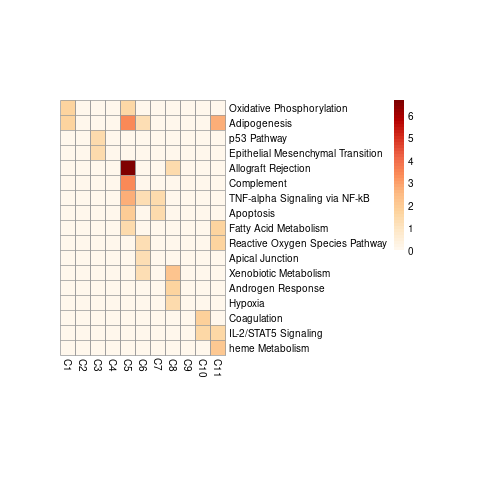

In [65]:
%%R
plt <- pheatmap(gsea_msig_mat,
         cluster_cols = FALSE,
        cluster_rows = FALSE,
        color = colorRampPalette((RColorBrewer::brewer.pal(9, "OrRd")))(50),
        cellheight = 15,
        cellwidth = 15
)

ggsave(plot = plt, filename = "/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/msigdb_heatmap_all_clusters.pdf")

### GO only heatmap

In [74]:
%%R
gsea_go_mat <- gsea_go[, c("Term", "cluster", "Adjusted.P.value")]
colnames(gsea_go_mat)[colnames(gsea_go_mat) == "Adjusted.P.value"] <- "pval_adj"
gsea_go_mat <- pivot_wider(gsea_go_mat, names_from = Term, values_from = pval_adj)
gsea_go_mat <- as.data.frame(gsea_go_mat)
rownames(gsea_go_mat) <- gsea_go_mat$cluster
gsea_go_mat <- gsea_go_mat[,-1]
gsea_go_mat <- -log10(t(gsea_go_mat))
gsea_go_mat[is.na(gsea_go_mat)] <- 0
gsea_go_mat <- as.data.frame(gsea_go_mat)
gsea_go_mat$C8 <- 0

In [83]:
%%R
new_order <- c()

for (i in 1:11) {
  col_name <- paste0("C", i)
  if (col_name %in% c("C8")) {
    new_order <- c(new_order, col_name)  # Add the new columns
  } else {
    new_order <- c(new_order, col_name)  # Add existing columns
  }
}

remaining_cols <- setdiff(colnames(gsea_go_mat), new_order)
new_order <- c(new_order, remaining_cols)

gsea_go_mat <- gsea_go_mat[, new_order]
gsea_go_mat

                                                                                     C1
Cellular Respiration (GO:0045333)                                              1.895439
RNA Splicing (GO:0008380)                                                      0.000000
Regulation Of Spindle Assembly (GO:0090169)                                    0.000000
Regulation Of Intracellular Transport (GO:0032386)                             0.000000
Endoplasmic Reticulum Membrane Organization (GO:0090158)                       0.000000
Extracellular Matrix Assembly (GO:0085029)                                     0.000000
Calcium-Mediated Signaling (GO:0019722)                                        0.000000
Negative Regulation Of Cell-Cell Adhesion (GO:0022408)                         0.000000
Peptidyl-Proline Hydroxylation (GO:0019511)                                    0.000000
Neutrophil Activation Involved In Immune Response (GO:0002283)                 0.000000
Fc Receptor Mediated Stimulatory

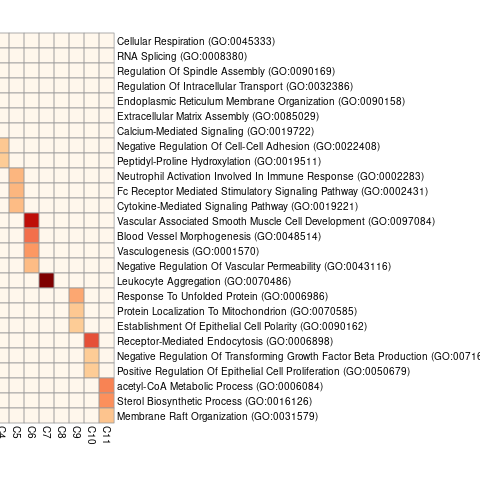

In [78]:
%%R
plt <- pheatmap(gsea_go_mat,
         cluster_cols = FALSE,
        cluster_rows = FALSE,
        color = colorRampPalette((RColorBrewer::brewer.pal(9, "OrRd")))(50),
        cellheight = 15,
        cellwidth = 15
)

ggsave(plot = plt, filename = "/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/go_heatmap_all_clusters.pdf",
      width = 12, height = 12)

### Plotting the combined heatmap

In [30]:
%%R
gsea_all_mat <- gsea_filtered [, c("Term", "cluster", "Adjusted.P.value")]
colnames(gsea_all_mat)[colnames(gsea_all_mat) == "Adjusted.P.value"] <- "pval_adj"
gsea_all_mat <- pivot_wider(gsea_all_mat, names_from = Term, values_from = pval_adj, values_fn = mean)
gsea_all_mat <- as.data.frame(gsea_all_mat)
rownames(gsea_all_mat) <- gsea_all_mat$cluster
gsea_all_mat <- gsea_all_mat[,-1]

gsea_all_mat <- -log10(t(gsea_all_mat))
gsea_all_mat[is.na(gsea_all_mat)] <- 0
gsea_all_mat <- as.data.frame(gsea_all_mat)
gsea_all_mat

In [31]:
%%R
#Adjust rownames for plotting
rownames(gsea_all_mat) <- gsub(" ", "_", rownames(gsea_all_mat))
rownames(gsea_all_mat) <- ifelse(grepl("GO:", rownames(gsea_all_mat)), 
                                 rownames(gsea_all_mat), 
                                 paste0("Hallmark_", rownames(gsea_all_mat)))
rownames(gsea_all_mat) <- ifelse(grepl("Hallmark", rownames(gsea_all_mat)), 
                                 toupper(rownames(gsea_all_mat)), 
                                 rownames(gsea_all_mat))

 [1] "Cellular_Respiration_(GO:0045333)"                                             
 [2] "HALLMARK_OXIDATIVE_PHOSPHORYLATION"                                            
 [3] "HALLMARK_ADIPOGENESIS"                                                         
 [4] "RNA_Splicing_(GO:0008380)"                                                     
 [5] "Regulation_Of_Spindle_Assembly_(GO:0090169)"                                   
 [6] "Regulation_Of_Intracellular_Transport_(GO:0032386)"                            
 [7] "HALLMARK_GLYCOLYSIS"                                                           
 [8] "HALLMARK_P53_PATHWAY"                                                          
 [9] "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"                                    
[10] "Endoplasmic_Reticulum_Membrane_Organization_(GO:0090158)"                      
[11] "Extracellular_Matrix_Assembly_(GO:0085029)"                                    
[12] "Calcium-Mediated_Signaling_(GO:0019722)"        

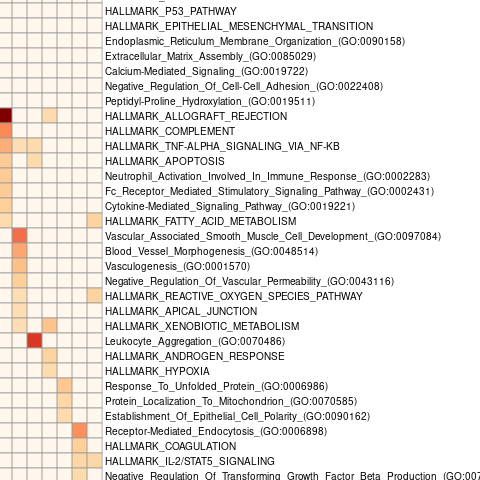

In [32]:
%%R
plt <- pheatmap(gsea_all_mat,
         cluster_cols = FALSE,
        cluster_rows = FALSE,
        color = colorRampPalette((RColorBrewer::brewer.pal(9, "OrRd")))(50),
        cellheight = 15,
        cellwidth = 15
)

ggsave(plot = plt, filename = "/home/michaelammeter/projects/aging/dge_splines/output/pathway_scores/gsea_results_d37/go_and_msigdb_heatmap_all_clusters.pdf",
      width = 12, height = 12)